In [21]:
import numpy as np
import scipy as sp
import scipy.sparse as ss
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from par2vec.common import *

### Load Reuters

In [79]:
# Load tokenized reuters
topic2id = np.load('data/reuters/reuters_topic2id.npy').item(0)
id2topic = np.load('data/reuters/reuters_id2topic.npy').item(0)
topics = list(np.load('data/reuters/reuters_topics.npy'))

word2id = np.load('data/reuters/reuters_word2id.npy').item(0)
id2word = np.load('data/reuters/reuters_id2word.npy').item(0)
tokenized = list(np.load('data/reuters/reuters_tokenized.npy'))

In [23]:
# Load tokenized 20_newsgroup
topic2id = np.load('data/20_newsgroup/20newsgroup_topic2id.npy').item(0)
id2topic = np.load('data/20_newsgroup/20newsgroup_id2topic.npy').item(0)
topics = list(np.load('data/20_newsgroup/20newsgroup_topics.npy'))

word2id = np.load('data/20_newsgroup/20newsgroup_word2id.npy').item(0)
id2word = np.load('data/20_newsgroup/20newsgroup_id2word.npy').item(0)
tokenized = list(np.load('data/20_newsgroup/20newsgroup_tokenized.npy'))

In [3]:
print('Unique words: ', len(word2id))
print('Unique docs:  ', len(tokenized))

Unique words:  59575
Unique docs:   20578


### Compute document graphs and essentials

In [21]:
# Create graphs for N documents
max_w=13

counts = np.zeros((len(tokenized), max_w))
entropies = []
cooccurences = []
weights = []
for i, (_, A_o, A_i) in enumerate(get_adj(tokenized, word2id)):
    if i % 5000 == 0:
        print('{}/{}'.format(i, len(tokenized)))
        
    # Graph
    A_i.sum_duplicates()
    A = A_i.data
    
    # Weight counts
    weights.append(A)
    bincount = np.bincount(A.astype(int))
    for j in range(min(len(bincount), max_w)):
        counts[i, j] = bincount[j]
        
    # Entropies
    entropies.append(sp.stats.entropy((A_o + A_i).data))
    
    # cooccurences
    cooccurences.append(sum(A>0))
    

# Parse data
x = np.arange(1, max_w)
y_mean = np.mean(counts[:,1:], axis=0)
y_std = np.std(counts[:,1:], axis=0)

0/20578
5000/20578
10000/20578
15000/20578
20000/20578


### Stats

In [60]:
flat_weights = [x for sublist in weights for x in sublist]
print('Weights MEAN:', np.mean(flat_weights))
print('Weights STD: ', np.std(flat_weights))

NameError: name 'weights' is not defined

In [23]:
print('Coocurrences MEAN: ', np.mean(cooccurences))
print('Coocurrences STD:  ', np.std(cooccurences))

Coocurrences MEAN:  115.258625717
Coocurrences STD:   118.801421714


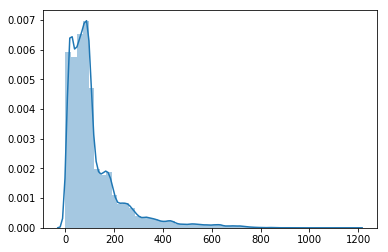

In [24]:
sns.distplot(cooccurences)
plt.show()

### Plot distribution of non-zero graph weights

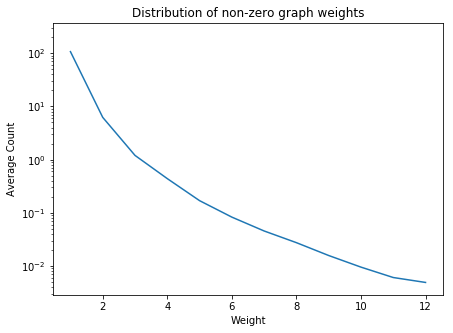

In [25]:
plt.figure(figsize=(7,5))
plt.title('Distribution of non-zero graph weights')
plt.xlabel('Weight')
plt.ylabel('Average Count')
plt.yscale('log')
plt.errorbar(x, y_mean, yerr=y_std)
plt.savefig('plots/dist_nonzero_graph_weights.png')
plt.show()

### Plot distribution graph entropies 

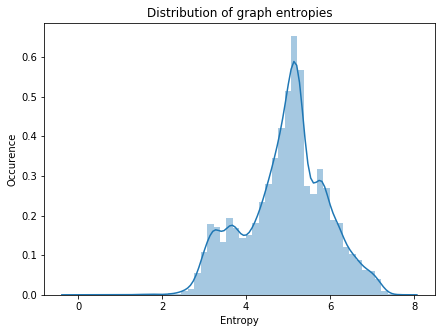

In [26]:
plt.figure(figsize=(7,5))
plt.title('Distribution of graph entropies')
plt.xlabel('Entropy')
plt.ylabel('Occurence')
sns.distplot(entropies, bins=50)
plt.savefig('plots/dist_graph_entropies.png')
plt.show()

### Plot distribution of topics

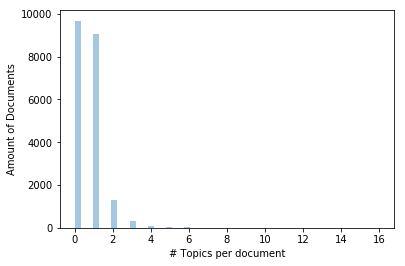

In [27]:
topic_count = [len(x) for x in topics]
plt.xlabel('# Topics per document')
plt.ylabel('Amount of Documents')
sns.distplot(topic_count, kde=False, )
plt.savefig('plots/dist_topics_over_docs.png')
plt.show()

### Plot class imbalance

Counts per class: [1000 1000 1000 1000 1000 1000  997 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000]


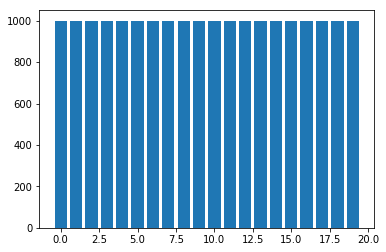

In [58]:
flat_topics = [item for sublist in topics for item in sublist]
topic_i, topic_count = np.unique(flat_topics, return_counts=True)
print('Counts per class:', topic_count)
plt.bar(topic_i, topic_count)
plt.savefig('plots/dist_topic_counts.png')
plt.show()

### Report Plots

In [61]:
def gen_doc_topic(dim_t=30, dim_d=16):
    num_t = np.random.randint(1,np.minimum(dim_t, 3))
    ts = np.random.choice(dim_t, num_t, replace=False)
    ts_boost = np.random.rand(np.shape(ts)[0])*3. + 0.5
    ts_boost = ts_boost[np.newaxis,:, np.newaxis]
    d = np.random.rand(1,dim_t, dim_d)
    d[...,ts, :]*= ts_boost
    return d
    
num_docs, dim_t, dim_d = 100, 30, 16
docs = np.zeros((num_docs, dim_t, dim_d))
for d in range(num_docs):
    docs[d,:,:] = gen_doc_topic(dim_t, dim_d)

In [81]:
topic_doc = np.zeros((len(topics), 135))
for i, topic in enumerate(topics):
    topic_doc[i][topic] = 1
np.sum(topic_doc[:, 81])

187.0

In [82]:
# for i, k in enumerate(np.sum(topic_doc, axis=0).astype(int)):
#      print(i, k)
docs = np.load('db_matrix.npy').reshape(-1, 64, 32)
print(np.where(topic_doc[:, 81]>0))
#81 en 74
docs.shape

(array([    5,    68,    96,   199,   228,   296,   302,   312,   326,
         485,   693,   832,   854,  1150,  1393,  1404,  1581,  1791,
        1881,  1965,  2086,  2171,  2358,  2381,  2455,  2520,  3081,
        3205,  3281,  3298,  3452,  3457,  3466,  3539,  3887,  3978,
        3980,  4039,  4075,  4082,  4132,  4391,  4489,  4511,  4548,
        4598,  5390,  5530,  5605,  5609,  5701,  5760,  5832,  6115,
        6264,  6268,  6889,  6905,  7036,  7355,  7514,  7624,  7699,
        7950,  8002,  8111,  8131,  8139,  8212,  8272,  8318,  8442,
        8521,  9057,  9196,  9520,  9616,  9755,  9918, 10171, 10174,
       10299, 10589, 10704, 10711, 10719, 10757, 10881, 11011, 11051,
       11232, 11540, 11606, 11611, 11738, 11777, 11835, 11839, 11884,
       11910, 11935, 11938, 11963, 11983, 12001, 12075, 12159, 12191,
       12253, 12274, 12347, 12371, 12424, 12438, 12708, 12709, 12710,
       12711, 12719, 12756, 12981, 13172, 13178, 13312, 13914, 14482,
       14511, 14602

(20578, 64, 32)

AttributeError: 'AxesSubplot' object has no attribute 'show'

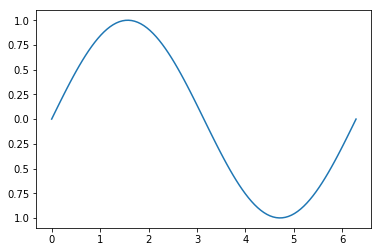

In [129]:
a = np.std(np.sum(docs[np.where(topic_doc[:, 74]>0)[0]], axis=2), axis=0)
b = np.std(np.sum(docs[np.where(topic_doc[:, 35]>0)[0]], axis=2), axis=0)
c = np.std(np.sum(docs, axis=2), axis=0)

print(np.sum(a-c))
print(np.sum(b-c))

-7.52666426771
-11.8934374413


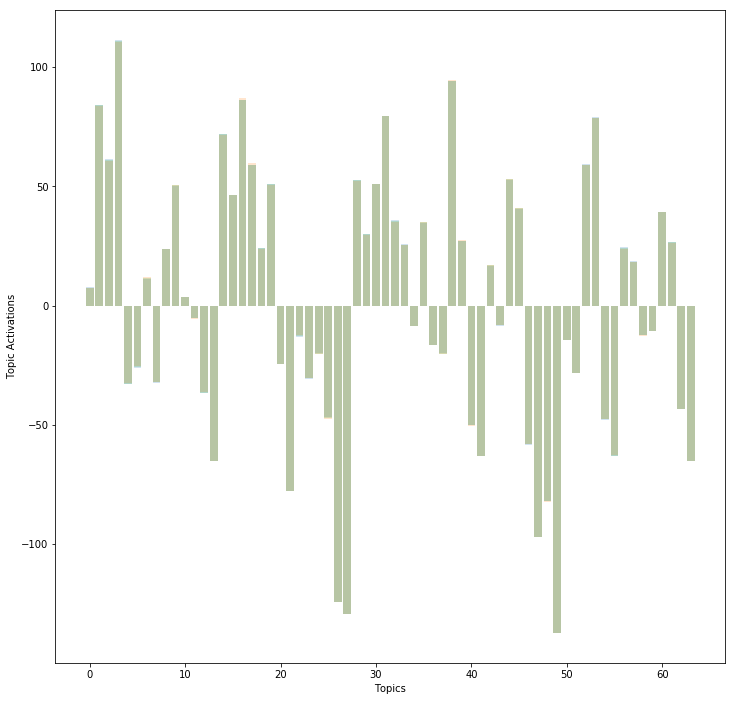

In [137]:
plt.figure(1, (12,12))
doc74 = np.sum(np.mean(docs[np.where(topic_doc[:, 74]>0)[0]], axis=0), axis=1)
plt.bar(np.arange(len(doc74)), doc74, alpha=0.2)

doc81 = np.sum(np.mean(docs[np.where(topic_doc[:, 0]>0)[0]], axis=0), axis=1)
plt.bar(np.arange(len(doc81)), doc81, alpha=0.2)

doc_all = np.sum(np.mean(docs, axis=0), axis=1)
plt.bar(np.arange(len(doc_all)), doc_all, alpha=0.2)
    
plt.xlabel('Topics')
plt.ylabel('Topic Activations')
plt.show()


Counts per class: [1000 1000 1000 1000 1000 1000  997 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000]


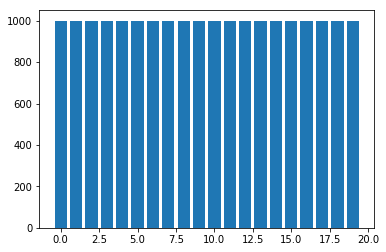

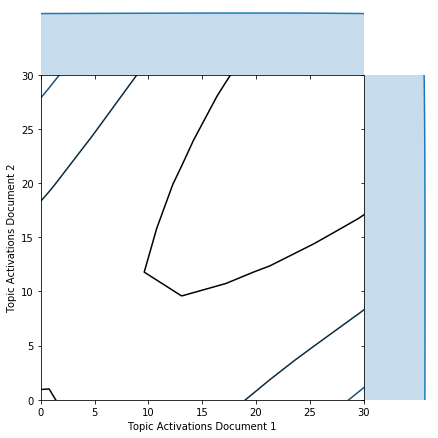

In [59]:
topic_i, topic_count = np.unique(flat_topics, return_counts=True)
print('Counts per class:', topic_count)
plt.bar(topic_i, topic_count)
plt.savefig('plots/dist_topic_counts.png')
fig = sns.jointplot(x=np.sum(docs[np.random.randint(dim_d)], 1), 
                    y=np.sum(docs[np.random.randint(dim_d)],1), 
                    kind="kde", space=0, stat_func=None, xlim=(0,30),ylim=(0,30), shade=False);
fig.set_axis_labels('Topic Activations Document 1', 'Topic Activations Document 2')
plt.show()

In [ ]:
d1 = np.sum(docs[np.random.randint(dim_d)], 1)
d2 = np.sum(docs[np.random.randint(dim_d)], 1)
g = sns.JointGrid(x=d1, y=d2, xlim=(0, 30), ylim=(0, 30))
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
g.set_axis_labels('Document 1 Topic Activations', 'Document 2 Topic Activations')